In [1]:
using Interact, PyPlot

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/2788aaff54f3972bd10a224d42612bcbc5553044-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/2788aaff54f3972bd10a224d42612bcbc5553044-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

# Review: An easy scalar ODE

Suppose we have the first-order (first-derivative only) [ordinary differential equation (ODE)](https://en.wikipedia.org/wiki/Ordinary_differential_equation):

$$
\frac{dx}{dt} = a x
$$

where $x$ and $a$ are *scalars*.    Even if you haven't taken 18.03, you should be able to solve this by inspection, using only elementary calculus: the **only functions whose derivatives are a multiple of themselves are exponentials**:

$$
x(t) = e^{at} c
$$

for *any* constant $c$.   To get $c$, we need to supply some more information, typically an [initial condition](https://en.wikipedia.org/wiki/Initial_value_problem): we tell you what $x(0)$ is.   By inspection, $c = x(0)$, so

$$
x(t) = e^{at} x(0)
$$

## Generalization to matrices?

Now, we would like to generalize this to a **system of ODEs**, where **x is a vector** and $a$ is **replaced by a matrix A**: how do we solve:

$$
\frac{d\vec{x}}{dt} = A\vec{x}
$$

given $\vec{x}(0)$?   The trick will be to **use eigenvectors**, for which the matrix **becomes a single number λ** and the problem turns back into the simple scalar problem above.

As you might already guess, **each eigenvector** will be multiplied by $e^{\lambda t}$, so the eigenvalues will tell us whether the solutions are exponentially growing or decaying … or oscillating if λ is complex.

# Exponential growth and decay

Consider the following system of two coupled first-order ordinary differential equations (ODEs): $$d\vec{x}/dt = A\vec{x}$$ for the 2×2 matrix:

$$
A = \begin{pmatrix}
0.1 & -0.1 \\
0.5 & -1
\end{pmatrix}
$$

In [2]:
A = [ 0.1 -0.1
      0.5 -1   ]

2×2 Array{Float64,2}:
 0.1  -0.1
 0.5  -1.0

To start with, let's "blindly" just plot the "brute-force" solutions for an initial condition $\vec{x}(0) = (1,10)$:

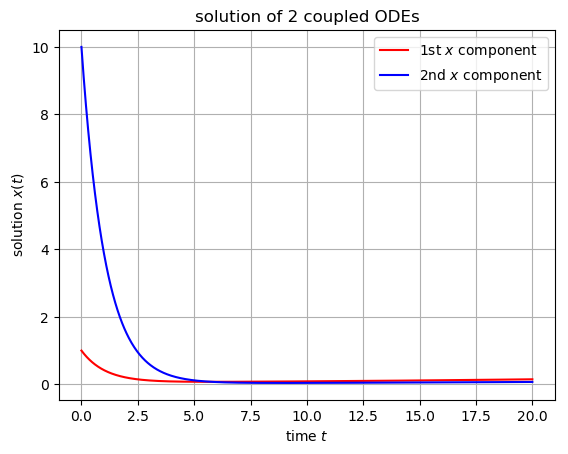

In [3]:
t = linspace(0, 20, 1000)
# find solution by the brute-force eᴬᵗ [1,10]:
x = [expm(A*t)*[1,10] for t in t]
plot(t, [x[1] for x in x], "r-")
plot(t, [x[2] for x in x], "b-")
xlabel(L"time $t$")
ylabel(L"solution $x(t)$")
legend([L"1st $x$ component", L"2nd $x$ component"])
title("solution of 2 coupled ODEs")
grid()

At first, it looks like the solutions are decaying, but then they start to grow.  If we plot it for a longer time, we can see that it eventually grows exponentially:

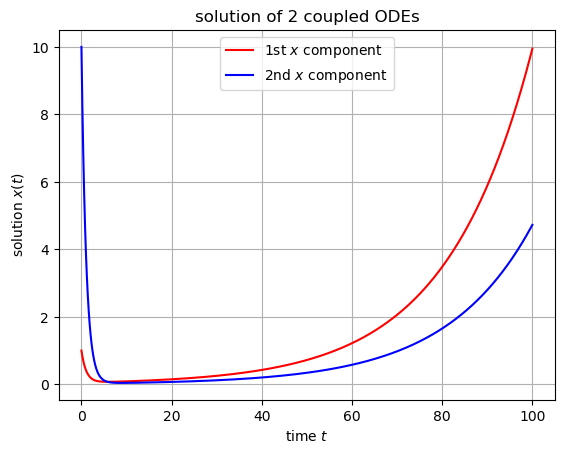

In [4]:
t = linspace(0, 100, 1000)
# find solution by the brute-force eᴬᵗ [1,10]:
x = [expm(A*t)*[1,10] for t in t]
plot(t, [x[1] for x in x], "r-")
plot(t, [x[2] for x in x], "b-")
xlabel(L"time $t$")
ylabel(L"solution $x(t)$")
legend([L"1st $x$ component", L"2nd $x$ component"])
title("solution of 2 coupled ODEs")
grid()

To understand this problem, we need only look at the eigenvalues and eigenvectors of $A$.  

Since this is $2\times2$, we could solve for them analytically via a quadratic equation, but let's just do it numerically.  (Partly because I am lazy, partly because the details of solving for the eigenvalues are unininteresting, and partly because in larger problems we will have no choice but to do it numerically anyway.)

In [5]:
λ, X = eig(A)
λ

2-element Array{Float64,1}:
  0.0524938
 -0.952494 

In [6]:
X

2×2 Array{Float64,2}:
 0.903256  0.0945865
 0.429103  0.995517 

There are two eigenvalues, $\lambda_1 \approx 0.05$ and $\lambda_2 \approx -0.95$.  We can expand *any* solution in the basis of the eigenvectors $\vec{x}_1$ and $\vec{x}_2$ as:

$$
\vec{x}(t) = c_1 e^{\lambda_1 t} \vec{v}_1 + c_2 e^{\lambda_2 t} \vec{v}_2
$$

where the coefficients $c_1$ and $c_2$ are typically determined by suppling an initial condition $\vec{x}(0)$: $\vec{c} = X^{-1} \vec{x}(0)$.

(It is easy to verify that this solves $d\vec{x}/dt = A\vec{x}$ just by plugging it in to the ODE.)

From the eigenvalues, we can easily see that the $\vec{x}_1$ solution is *slowly exponentially growing* and the $\vec{x}_2$ solution is *quickly exponentially decaying*.  That's why, when we plot the solution, we see a rapid exponential decay followed by a slow exponential growth.

Furthermore, we can solve for the coefficients when $\vec{x}(0) = (1,10)$:

In [7]:
c = X \ [1, 10]

2-element Array{Float64,1}:
  0.0578278
 10.0201   

Notice that this initial condition "happens" to almost entirely consist of the $\vec{x}_2$ eigenvector, with only a small $\vec{x}_1$ component.   This means that it takes an especially long time for the $e^{\lambda_1 t}$ exponential growth to amplify the $\vec{x}_1$ component to the point where it becomes obvious on the plot of the solution.

### Key points

* **Negative real λ** correspond to *exponentially decaying solutions*.
* **Positive real λ** correspond to *exponentially growing solutions*.
* **Zero real λ** correspond to *steady solutions* (neither decaying nor growing).
* The **initial conditions** determine the coefficients of each eigenvector in the solution.

# A mass and spring

Let's consider the motion of a mass $m$ sliding without friction and attached to a spring:

<img src="https://ccrma.stanford.edu/~jos/Laplace/img60.png">

Newton's law for the position $x(t)$ gives the 2nd-order (has up to 2nd derivatives) ordinary differential equation (ODE):

$$
m \frac{d^2 x}{dt^2} = -kx
$$

where $k$ is the spring constant.  We can instead write this in terms of a *system* of first-order (1st derivatives only) ODEs by adding a variable $v = dx/dt$ (the velocity):

$$
\frac{d x}{dt} = v \\
\frac{d v}{dt} = -\frac{k}{m}x
$$

which can be written in matrix form as $d\vec{x}/dt = Ax$:

$$
\frac{d}{dt} \underbrace{\begin{pmatrix} x \\ v \end{pmatrix}}_\vec{x} =
\underbrace{\begin{pmatrix} 0 & 1 \\ -k/m & 0 \end{pmatrix}}_A \vec{x}
$$

Let's choose $k/m = 1/100$.  Then we have

In [8]:
A = [ 0     1 
     -0.01  0 ]

2×2 Array{Float64,2}:
  0.0   1.0
 -0.01  0.0

If we have an initial position $x(0)=0$ and an initial velocity $v(0)=1$, so that $\vec{x}(0) = (0,1)$, the solutions $x(t)$ look like:

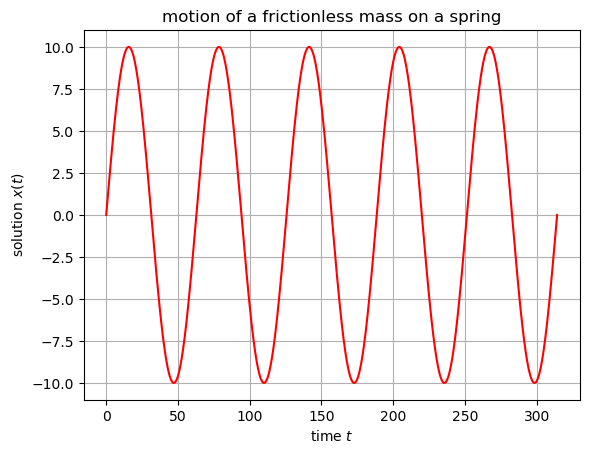

In [9]:
t = linspace(0, 20π*5, 1000)
# find solution by the brute-force eᴬᵗ [0,1]:
plot(t, [(expm(A*t)*[0,1])[1] for t in t], "r-")
xlabel(L"time $t$")
ylabel(L"solution $x(t)$")
title("motion of a frictionless mass on a spring")
grid()

The key to understanding this behavior is to look at the eigenvalues of $A$, because each eigenvector has time dependence $e^{\lambda t}$.

$A$ has eigenvalues $\lambda_1 = 0.1i$, $\lambda_2 = -0.1i$, which can easily be computed by hand or via computer:

In [10]:
λ, X = eig(A)
λ

2-element Array{Complex{Float64},1}:
 0.0+0.1im
 0.0-0.1im

The correpsonding eigenvectors are complex as well, but come in a **complex conjugate pair** since $A$ is real:

In [11]:
X

2×2 Array{Complex{Float64},2}:
 0.995037+0.0im        0.995037-0.0im      
      0.0+0.0995037im       0.0-0.0995037im

If we expand our initial condition in this basis, we have:

$$
\vec{x}(0) = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = c_1 \vec{x}_1 + c_2 \vec{x}_2 = X \vec{c}
$$

where $\vec{c} = X^{-1} \vec{x}(0)$ is:

In [12]:
c = X \ [0, 1]

2-element Array{Complex{Float64},1}:
 0.0-5.02494im
 0.0+5.02494im

Note that the coefficients are complex conjugates as well!

In fact, this *must* happen in order to get a real vector from the sum of our two complex-conjugate eigenvectors.  Adding two complex conjugates cancels the imaginary parts and gives us twice the real part:

$$
\vec{x}(0) = c_1 \vec{x}_1 + \overline{c_1 \vec{x}_1 } = 2\operatorname{Re}[c_1 \vec{x}_1]
$$

which is real.  Any coefficient $c_2 \ne \overline{c_1}$ would not have summed to a real vector.  Let's check this formula (`real` computes the real part in Julia):

In [13]:
2*real(c[1]*X[:,1])

2-element Array{Float64,1}:
 0.0
 1.0

Now, for the eigenvectors, the matrix $A$ acts just like a scalar $\lambda$, and the solution of the scalar ODE $dc/dt = \lambda c$ is just $e^{\lambda t} c(0)$.

So, we just multiply each eigenvector component of $\vec{x}(0)$ by $e^{\lambda t}$ and sum to get the solution:


$$
\vec{x}(t) = c_1 e^{\lambda_1 t} \vec{x}_1 + c_2 e^{\lambda_2 t} \vec{x}_2 = c_1 e^{\lambda_1 t} \vec{x}_1 + \overline{c_1 e^{\lambda_1 t} \vec{x}_1 } = 2\operatorname{Re}\left[c_1 e^{\lambda_1 t} \vec{x}_1\right]
$$

where we have used the fact that the eigenvalues are complex conjugates.

Now, let's try to write this in some more comprehensible form.  The position $x(t)$ is just the first component of this result, i.e. it is some value of the form:

$$
x(t) = \operatorname{Re} \left[ \xi e^{\lambda_1 t} \right]
$$

where $\xi = 2c_1 (1,0)^T x_1$ is the first component of the coefficient vector.   If we write $\xi = r e^{i\phi}$ in polar form, this simplifies even more:

In [14]:
ξ = 2 * c[1] * X[1,1]

0.0 - 10.000000000000002im

In [15]:
# polar form of α:
r = abs(ξ)
ϕ = angle(ξ)
r, ϕ/π

(10.000000000000002, -0.5)

In terms of this, we have:

$$
x(t) = \operatorname{Re} \left[ r e^{i(0.1t + \phi)} \right] = r \cos(0.1t + \phi)
$$

using Euler's identity $e^{i\theta} = \cos \theta + i \sin \theta$.  Let's check this by plotting it along with the numerical solution:

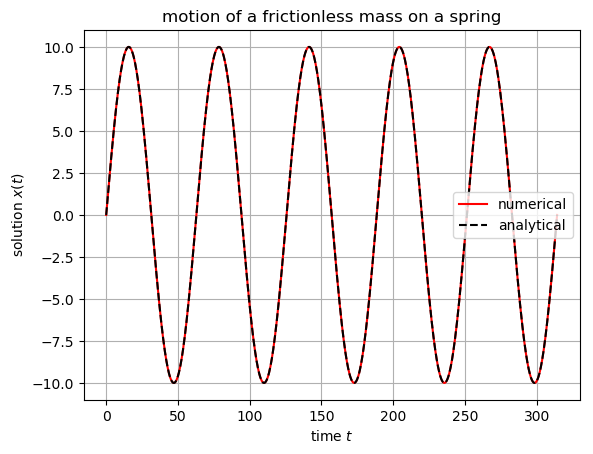

PyObject <matplotlib.legend.Legend object at 0x135ee6278>

In [16]:
t = linspace(0, 20π*5, 1000)
# find solution by the brute-force eᴬᵗ [0,1]:
plot(t, [(expm(A*t)*[0,1])[1] for t in t], "r-")
plot(t, [r*cos(0.1*t + ϕ) for t in t], "k--")
xlabel(L"time $t$")
ylabel(L"solution $x(t)$")
title("motion of a frictionless mass on a spring")
grid()
legend(["numerical", "analytical"])

Yup, they fall right on top of one another!

### Key points:

* **A purely imaginary λ corresponds to an *oscillating* ODE solution**, and $\omega = \operatorname{Im} \lambda$ is the **angular frequency**.

* The amplitude and phase of the oscillations are determined by the **initial conditions**.

* For **real A**, the eigensolutions come in **complex-conjugate pairs**, so that **real initial conditions lead to real solutions**.

Given an angular frequency $\omega$, corresponding to time dependence $e^{i\omega t}$ or $\cos(\omega t + \phi)$, the **period** of the oscillation (the time to repeat) is $2\pi /\omega$:

In [17]:
2π/0.1

62.83185307179586

Here, it repeats every 62 time units, which matches the graph above.

# Mass and spring with damping

We can also add some *damping* or *friction* to the problem.  For example, a [simple model of air resistance](https://en.wikipedia.org/wiki/Stokes%27_law) is a drag force that is *proportional to velocity* and *opposite in sign*.

This changes our equations to:

$$
\frac{d x}{dt} = v \\
\frac{d v}{dt} = -\frac{k}{m}x - d v
$$

where $d$ is the drag coefficient, which can again be written in matrix form as $d\vec{x}/dt = Bx$:

$$
\frac{d}{dt} \underbrace{\begin{pmatrix} x \\ v \end{pmatrix}}_\vec{x} =
\underbrace{\begin{pmatrix} 0 & 1 \\ -k/m & -d \end{pmatrix}}_B \vec{x}
$$

Let's try it out for a drag coefficent $d = 0.02$:

In [18]:
B = [ 0      1 
     -0.01  -0.02 ]

2×2 Array{Float64,2}:
  0.0    1.0 
 -0.01  -0.02

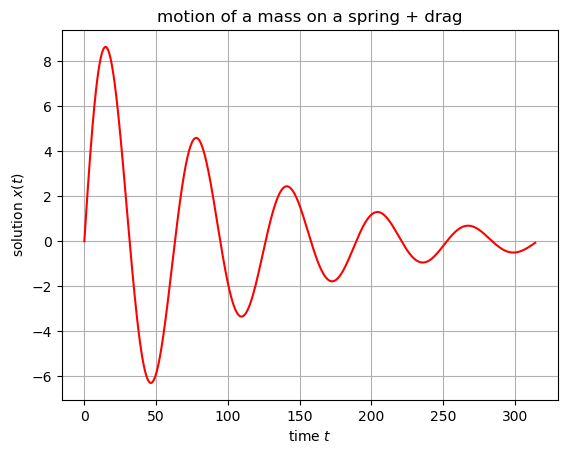

In [19]:
t = linspace(0, 20π*5, 1000)
# find solution by the brute-force eᴬᵗ [0,1]:
plot(t, [(expm(B*t)*[0,1])[1] for t in t], "r-")
xlabel(L"time $t$")
ylabel(L"solution $x(t)$")
title("motion of a mass on a spring + drag")
grid()

As you might expect, adding drag causes the mass to slow down more and more.

How is this reflected in the eigenvalues?

In [20]:
eigvals(B)

2-element Array{Complex{Float64},1}:
 -0.01+0.0994987im
 -0.01-0.0994987im

The eigenvalues are $\approx -0.01 \pm 0.0994987i$.

Again, for this $2\times2$ matrix problem we could easily calculate the eigenvalues analytically.  (In 18.03 you do this over and over again.)  Skipping the simple algebra (just a quadratic equation), they are:

$$
-\frac{d}{2} \pm i \sqrt{0.01 - \left(\frac{d}{2}\right)^2} = -\alpha \pm i\omega
$$

where I've defined $\alpha = -\operatorname{Re} \lambda$ and $\omega = |\operatorname{Im} \lambda|$.

In [21]:
sqrt(0.01 - (0.02/2)^2)

0.099498743710662

What will this do to the solutions?

Well, the basic solution process will be the same.  We will still get a solution of the form:

$$
\vec{x}(t) = 2\operatorname{Re}\left[c_1 e^{\lambda_1 t} \vec{x}_1\right]
$$

where $\vec{x}_1$ is the first eigenvector of $B$ and $c_1$ is an expansion coefficient for the initial condition.

But now we have $\lambda_1 = -\alpha + i\omega$ and, similar to before, we get:

$$
x(t) =\operatorname{Re} \left[r e^{-\alpha t + i\omega t + i\phi} \right]
= r e^{-\alpha t} \cos(\omega t + \phi)
$$

So, $\alpha = -\operatorname{Re} \lambda$ is an **exponential decay** rate and $\omega = |\operatorname{Im} \lambda|$ is still a frequency (with a value slightly changed from the frictionless case).  It is nice to plot this $e^{-\alpha t}$ factor on top of our solution:

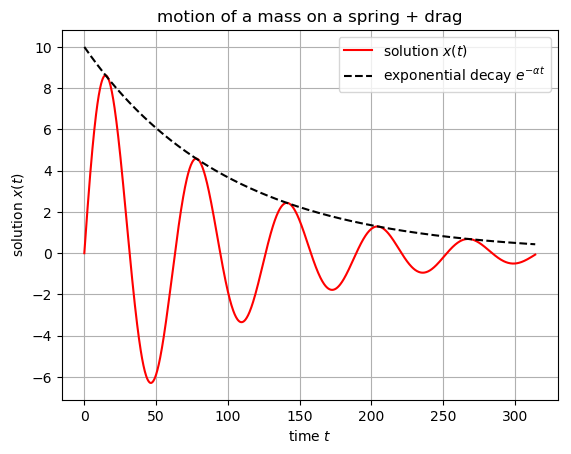

In [22]:
t = linspace(0, 20π*5, 1000)
# find solution by the brute-force eᴬᵗ [0,1]:
plot(t, [(expm(B*t)*[0,1])[1] for t in t], "r-")
plot(t, 10*exp.(-0.01 * t), "k--")
xlabel(L"time $t$")
ylabel(L"solution $x(t)$")
title("motion of a mass on a spring + drag")
legend(["solution \$x(t)\$", "exponential decay \$e^{-\\alpha t}\$"])
grid()

### Key points:

* For complex λ, **Re(λ) is an exponential growth rate (> 0) or decay rate (< 0)**.

* **Im(λ) is an angular frequency**

* If **all λ have Re(λ) < 0**, the solution decays to zero.

* If **any λ have Re(λ) > 0**, the solution blows up.

* A **λ = 0 solution corresponds to a *steady state* **.  If only the real part is zero, it is a solution that oscillates forever without growing or decaying.

## Overdamping:

From the formula above for the eigenvalues of the damped-spring system:

$$
-\frac{d}{2} \pm i \sqrt{0.01 - \left(\frac{d}{2}\right)^2}
$$

you might notice something:  if $d$ gets large enough, then the eigenvalues become *purely real* and negative.  In particular, if $(d/2)^2 > 0.01$, or equivalently if $d > 0.2$, then the eigenvalues are

$$
-\frac{d}{2} \pm \sqrt{\left(\frac{d}{2}\right)^2 - 0.01}
$$

which are real and negative.  The solutions don't oscillate at all, they just decay!  This is called **overdamping**.  Let's check this for $d = 0.3$:

In [23]:
eigvals([ 0      1 
       -0.01  -0.3 ])

2-element Array{Float64,1}:
 -0.0381966
 -0.261803 

Yup, two negative eigenvalues, as predicted.  It is interesting to plot the solutions for different values of $d$ to compare them:

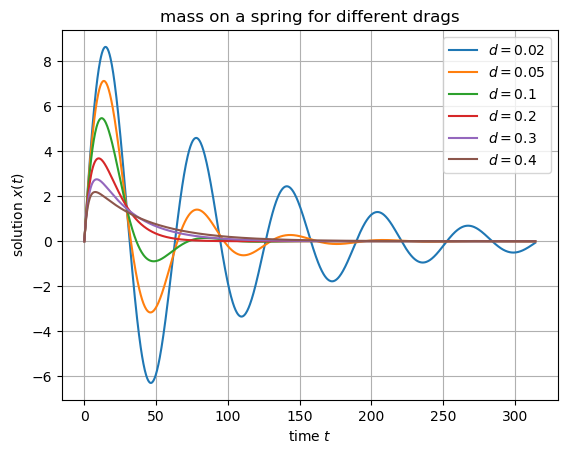

In [24]:
ds = [0.02, 0.05, 0.1, 0.2, 0.3, 0.4]
t = linspace(0, 20π*5, 1000)
for d in ds
    Bd = [ 0      1 
          -0.01  -d ]
    plot(t, [(expm(Bd*t)*[0,1])[1] for t in t], "-")
end
xlabel(L"time $t$")
ylabel(L"solution $x(t)$")
title("mass on a spring for different drags")
legend(["\$d=$d\$" for d in ds])
grid()

It's even more fun to use a slider control for $d$:

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_02", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-9540950e-3cc6-4a1c-9468-26dbc2ab118f", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["d"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 0.3),Pair{Symbol,Any}(:min, 0.0),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 0.01),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Float64}("ob_01", 0.15, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/stevenj/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/stevenj/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/stevenj/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/stevenj/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/stevenj/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":0.15}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(functi
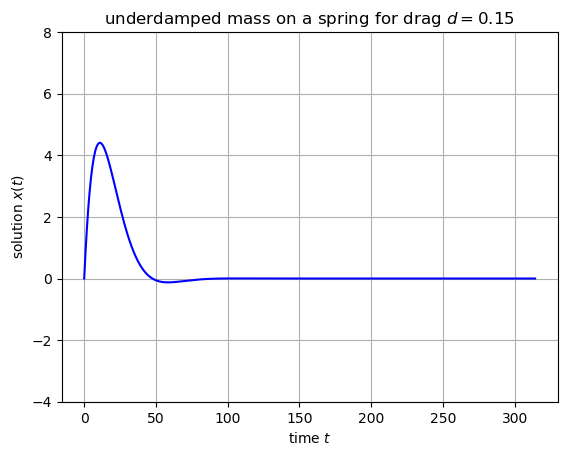
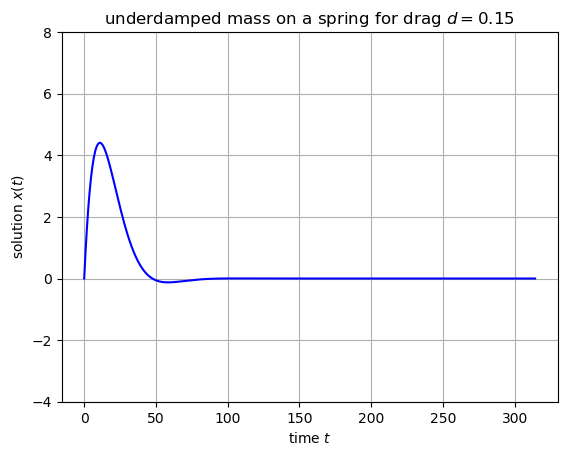

In [25]:
t = linspace(0, 20π*5, 1000)
fig = figure()
@manipulate for d in 0.0:0.01:0.3
    Bd = [ 0      1 
          -0.01  -d ]
    withfig(fig) do
        c = d < 0.1999 ? "blue" : d > 0.2001 ? "red" : "black"
        plot(t, [(expm(Bd*t)*[0,1])[1] for t in t], "-", color=c)
        xlabel(L"time $t$")
        ylabel(L"solution $x(t)$")
        T = c == "blue" ? "underdamped" : c == "red" ? "overdamped" : "critically damped"
        title("$T mass on a spring for drag \$d=$d\$")
        ylim(-4,8)
        grid()
    end
end

The case of $d=0.2$, where the discriminant $\sqrt{\cdots} = 0$ and the two eigenvalues are *equal*, is called [critically damped](https://en.wikipedia.org/wiki/Harmonic_oscillator).  This is a bit of an odd case because the matrix becomes *defective* (non-diagonalizable): there is only a single eigenvector.

We will analyze such defective cases later in 18.06.  They are not our primary concern, though, because they are kind of a weird limiting case that doesn't show up most of the time.

# Two coupled masses on springs

When we are solving things by hand, it is hard to go beyond $2\times 2$ matrices, but on the computer we have no such limitations.  **Practical engineering problems are solved every day involving millions of coupled differential equations**.

Let's try upgrading to *two* coupled masses on springs:

<img src="https://i.stack.imgur.com/5R7Bn.png">

Now, our equations look like:

$$
\frac{d x_1}{dt} = v_1 \\
\frac{d x_2}{dt} = v_2 \\
\frac{d v_1}{dt} = -\frac{k_1}{m}x_1 -\frac{k_2}{m}(x_1 - x_2) \\
\frac{d v_2}{dt} = -\frac{k_3}{m}x_2  +\frac{k_2}{m}(x_1 - x_2) 
$$

where the spring $k_2$ connecting the two masses exerts a force $\pm k_2 (x_1 - x_2)$, with the two masses feeling an equal and opposite force from that spring.

This can be written in matrix form as $d\vec{x}/dt = Cx$:

$$
\frac{d}{dt} \underbrace{\begin{pmatrix} x_1 \\ x_2 \\ v_1 \\ v_2 \end{pmatrix}}_\vec{x} =
\underbrace{\begin{pmatrix} 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 \\ 
-(k_1+k_2)/m & k_2/m & 0 & 0 \\
k_2/m & -(k_3+k_2)/m & 0 & 0
\end{pmatrix}}_C \vec{x}
$$

Let's set $m_1 = m_2 = m$ and $k_1/m = k_2/m = k_3/m = 0.01$ for simplicity.

In [26]:
C = [ 0     0    1 0
      0     0    0 1
     -0.02  0.01 0 0
      0.01 -0.02 0 0 ]

4×4 Array{Float64,2}:
  0.0    0.0   1.0  0.0
  0.0    0.0   0.0  1.0
 -0.02   0.01  0.0  0.0
  0.01  -0.02  0.0  0.0

Again, let's just try plotting the solutions $x_1(t)$ and $x_2(t)$ computed by "brute force" first, assuming an initial condition $\vec{x}(0) = (0,0,1,0)$ where we start $x_1$ moving from rest:

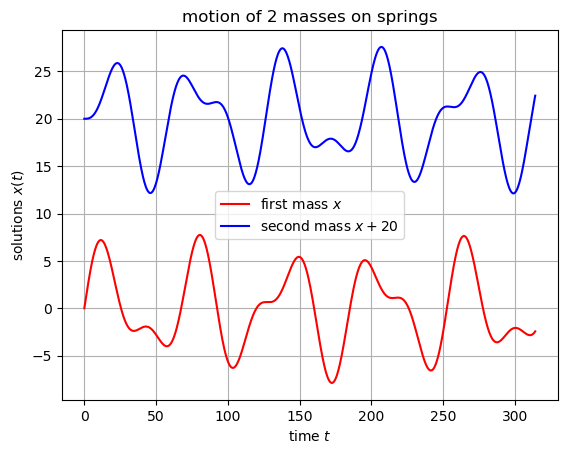

In [27]:
t = linspace(0, 20π*5, 1000)
# find solution by the brute-force eᴬᵗ [0,1]:
x = [(expm(C*t)*[0,0,1,0]) for t in t]
plot(t, [x[1] for x in x], "r-")
plot(t, [x[2]+20 for x in x], "b-")
xlabel(L"time $t$")
ylabel(L"solutions $x(t)$")
title("motion of 2 masses on springs")
legend([L"first mass $x$", L"second mass $x+20$"])
grid()

So, this looks a bit more complicated.  But the eigenvalues should clarify the situation for us:

In [28]:
eigvals(C)

4-element Array{Complex{Float64},1}:
 -1.38778e-18+0.173205im
 -1.38778e-18-0.173205im
 -1.59595e-17+0.1im     
 -1.59595e-17-0.1im     

There are four **purely imaginary** (=oscillating!) eigenvalues, coming in two complex-conjugate pairs.  So, there are only **two frequencies** in this problem: $\omega_1 = 0.1$ and $\omega_2 = 0.1\sqrt{2} \approx 0.173205$.

It is possible to get *only one of these solutions at a time* if we *choose our initial conditions to excite only one eigenvector* (or one complex-conjugate pair).

In particular, for a given eigenvector $\vec{x}_k$, there is a solution $\vec{x}(t) = e^{\lambda_k t} \vec{x}_k$ with initial condition $\vec{x}(0) = \vec{x}_k$.

Or, we could get a real solution from an eigenvector by adding the complex-conjugate solution (which is also an eigenvector since the matrix is real), corresponding to a solution:

$$
\vec{x}(t) = \operatorname{Re} \left[ c e^{\lambda_k t} \vec{x}_k \right]
$$

with an initial condition $\vec{x}(0) = \operatorname{Re} \left[ c \vec{x}_k \right]$, where $c$ is an arbitrary complex number that determines the amplitude and phase of the oscillation.

For an oscillating system, these are often called the [normal modes](https://en.wikipedia.org/wiki/Normal_mode) of oscillation.  Let's plot these two "eigensolutions" for our 2-mass problem:

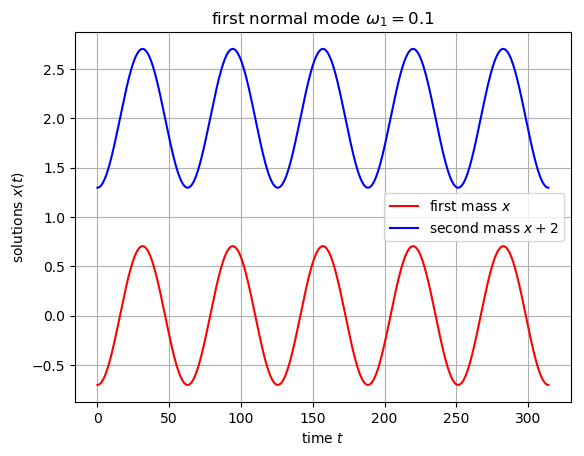

In [29]:
λ, X = eig(C)
t = linspace(0, 20π*5, 1000)
# initial condition from the real part of the first eigenvector:
x = [(expm(C*t)*X[:,3]) for t in t]
plot(t, [real(x[1]) for x in x], "r-")
plot(t, [real(x[2])+2 for x in x], "b-")
xlabel(L"time $t$")
ylabel(L"solutions $x(t)$")
title("first normal mode \$\\omega_1 = 0.1\$")
legend([L"first mass $x$", L"second mass $x+2$"])
grid()

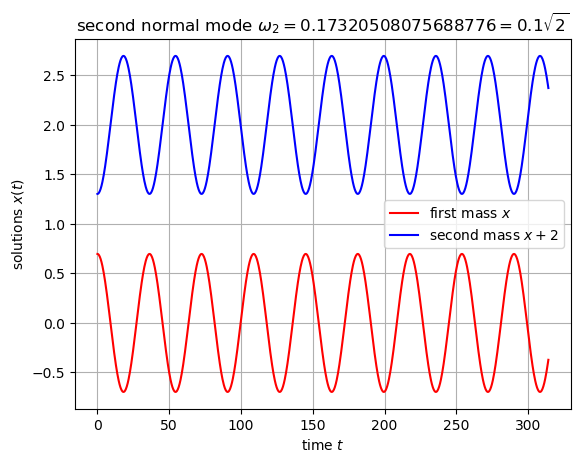

In [30]:
# initial condition from the real part of the first eigenvector:
x = [(expm(C*t)*X[:,1]) for t in t]
plot(t, [real(x[1]) for x in x], "r-")
plot(t, [real(x[2])+2 for x in x], "b-")
xlabel(L"time $t$")
ylabel(L"solutions $x(t)$")
title("second normal mode \$\\omega_2 = $(imag(λ[1])) = 0.1\\sqrt{2}\$")
legend([L"first mass $x$", L"second mass $x+2$"])
grid()

If you look carefully at the plots, you will see a simple pattern:

* The *lower-frequency* solution is when the masses are *moving in the same direction*.
* The *higher-frequency* solution is when the masses are *moving in opposite directions*.

There are lots of interesting phenomena to think about in coupled mass-spring systems, but let's leave most of the physics to 8.03.

# Hints of things to come: Eigenvalues and matrix structure

From basic physical intuition, these coupled mass/spring systems *must* have purely imaginary eigenvalues if there is no damping/drag/friction!  In a physics class, we would say that "energy is conserved": the oscillations cannot increase ($\operatorname{Re}\lambda>0$) or decrease ($\operatorname{Re}\lambda<0$) because there is no place else for the energy to go.

And if there is drag, then the eigenvalues *must* have negative real parts: the oscillations must be *losing* energy, not gaining it.

But these physical laws must arise *algebraically* somehow!  There must be something in the *structure* of the matrices (the *pattern* of their entries) that guarantees it for any positive values of $k$, $m$, or $d$.  This turns out to be an extremely important topic in linear algebra: deriving *general* facts about the eigenvalues of matrices from their structure (even though the specific values of the eigenvalues must be found by a computer).

We've already seen this for Markov matrices: the fact that their columns summed to one guaranted a $\lambda=1$ eigenvalue and other $|\lambda|\le 1$ ($<1$ for positive entries).
In the case of masses and springs, the physical properties of the normal modes turn out to be closely related to [real-symmetric matrices](https://en.wikipedia.org/wiki/Symmetric_matrix) $A=A^T$, which we will soon see have very special eigen-properties.

# A Note On Numerical Solution of ODEs

Matrices and eigenvalues are a great way to understand linear ODEs.  They can even be used to study *nonlinear* ODEs via, for example, [linear stability analysis](https://en.wikipedia.org/wiki/Linear_stability).

However, if you want to get a *numerical* answer from an ODE, there is a completely different set of [techniques for numerically integrating ODEs](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations) that I should mention.  Such techniques have the advantage of being *extremely general*: they can handle time-varying and nonlinear problems with no difficulty, for example.  (Interestingly enough, linear algebra also plays an important role in analyzing these methods.)  An extremely powerful Julia package of numerical ODE methods is [DifferentialEquations.jl](https://github.com/JuliaDiffEq/DifferentialEquations.jl), but there are also nice packages in other languages.